# 第四周课程内容：Pandas细节

## 简介和基础知识
经过第四周的学习，相信大家对python中的函数应用和Numpy、Pandas两大数据分析模块的基础应用有了更加深入的了解。

让我们来实际应用一下所学到的知识和方法，做一个简单的数据处理和分析。

### 任务背景

现在我们手上有一份价格数据，内容是XAU, XAG, XPT三种贵金属过去5年的价格数据。这些数据都保存在Precious Metals.xlsx中。
请下载Precious Metals.xlsx，与本Notebook文件保存在同一文件夹下。

### 开始
要开始处理数据，我们首先需要  `import` 所需的功能，并将数据导入 pandas。

利用DataFrame中的函数运行以下代码单元格，加载我们的数据并使用 `.head(10) ` 函数显示前几个数据进行检查。
> **提示：**你可以通过点击单元格和使用键盘快捷键 **Shift + Enter** 或 **Shift + Return** 运行代码单元格。此外，在选中单元格后还可以使用工具栏中的**播放**按钮执行代码单元格。双击 Markdown 单元格（如下所示的文本单元格）即可进行编辑，并使用相同的快捷键保存。

In [1]:
#Import Numpy and Pandas
import numpy as np
import pandas as pd
from IPython.display import display   # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# TO DO: Load the data to 'full_data'
full_data=pd.read_excel('Precious Metals.xlsx')

# Print the first few rows of the data
display(full_data.head(10))

,Date,TYPE,Open,High,Low,Last
0,2013-08-16,Xag,22.94,23.40,22.74,23.20
1,2013-08-19,Xag,23.23,23.60,22.94,23.12
2,2013-08-20,Xag,23.13,23.31,22.26,22.99
3,2013-08-21,Xag,22.94,23.34,22.72,22.84
4,2013-08-22,Xag,22.81,23.32,22.43,23.11
5,2013-08-23,Xag,23.09,24.08,22.87,23.95
6,2013-08-26,Xag,23.99,24.40,23.83,24.27
7,2013-08-27,Xag,24.30,24.67,23.94,24.47
8,2013-08-28,Xag,24.45,25.08,24.21,24.34
9,2013-08-29,Xag,24.32,24.40,23.65,23.83


让我们来仔细看一下，这个数据表格的内容：
- **Date：** 交易日期
- **TYPE：** 贵金属的品种，有XAU, XAG, XPT三种
- **Open：** 开盘价格
- **High：** 最高价
- **Low：** 最低价
- **Last：** 收盘价

### 问题1（1分）：
我们先来尝试回答这几个简单的问题：
1. 每个贵金属的品种，有多少数据？
2. 每个贵金属的品种，最高价到过多少？最低价又是多少？

>**提示：** 用groupby 和 agg 结合的方法输出结果


In [3]:
# TO DO: Use groupby() and agg() to display results
full_data.groupby('TYPE').agg({'Date':'count','High':'max','Low':'min'})



,Date,High,Low
TYPE,,,
XAU,1300,1433.31,1045.85
XPT,1302,1552.50,781.70
Xag,1301,25.08,13.60


**最后打印结果应该为**
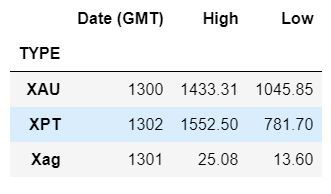

### 问题2（1分）：
我们发现数据中有个比较尴尬的事情，就是白银 Xag 只有首字母是大写。在进一步操作前，我们来尝试把 TYPE 都统一成英文大写

>**提示：** 用`str.upper()`来实现大写转换

In [4]:
#TO DO: Change all strings in 'TYPE' to uppercase
full_data.TYPE=full_data.TYPE.map(str.upper)
display(full_data.head(10))
# 用display(full_data.head(10))检查结果

,Date,TYPE,Open,High,Low,Last
0,2013-08-16,XAG,22.94,23.40,22.74,23.20
1,2013-08-19,XAG,23.23,23.60,22.94,23.12
2,2013-08-20,XAG,23.13,23.31,22.26,22.99
3,2013-08-21,XAG,22.94,23.34,22.72,22.84
4,2013-08-22,XAG,22.81,23.32,22.43,23.11
5,2013-08-23,XAG,23.09,24.08,22.87,23.95
6,2013-08-26,XAG,23.99,24.40,23.83,24.27
7,2013-08-27,XAG,24.30,24.67,23.94,24.47
8,2013-08-28,XAG,24.45,25.08,24.21,24.34
9,2013-08-29,XAG,24.32,24.40,23.65,23.83


**最后打印结果应该为**
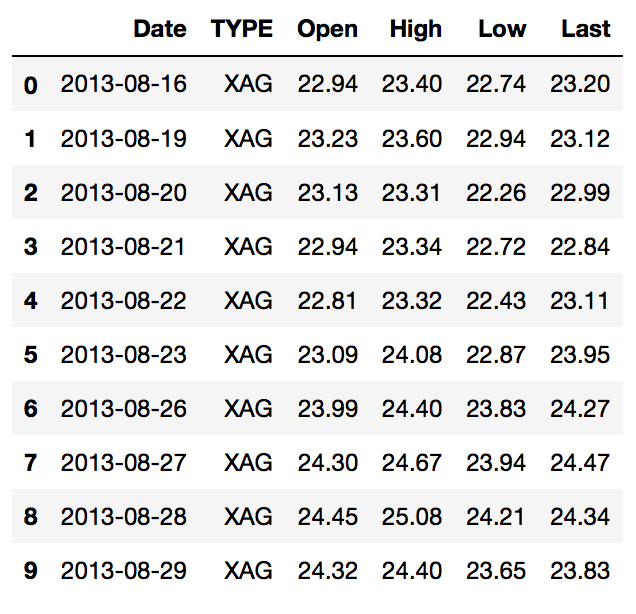

### 问题3（2分）：
我们现在截取所有2017年交易日的数据，保存到data_2017中。可以通过以下两步完成：
1. 生成一个dates变量，包含的是所有2017年的日历日
2. 选择full_data中，所有交易日期属于变量 dates 的记录，保存为data_2017

>**提示：** 可以通过`pd.data_range`生成所有2017年的日历日；在对数据切片时，可以使用`full_data['Date'].isin(dates)`来判断日期是否落在dates里

In [9]:
# TO DO: Create dates with all calender day in 2017
dates =  pd.date_range(start='2017-01-01', end='2017-12-31', closed=None)  # 将''用你的代码替换，注意：仅一行代码

# TO DO: Pick up all records in 2017, save to 'data_2017'
data_2017 = full_data[full_data['Date'].isin(dates)]  # 将''用你的代码替换，注意：仅一行代码
display(data_2017.tail(10))
# 用display(data_2017)检查结果

,Date,TYPE,Open,High,Low,Last
3731,2017-12-18,XPT,891.5,915.0,886.50,906.49
3732,2017-12-19,XPT,909.8,919.4,900.70,913.70
3733,2017-12-20,XPT,913.8,922.8,906.50,918.50
3734,2017-12-21,XPT,918.5,920.3,907.30,915.40
3735,2017-12-22,XPT,915.4,921.9,905.24,916.40
3736,2017-12-25,XPT,917.5,917.5,913.99,913.99
3737,2017-12-26,XPT,913.5,922.3,910.24,918.49
3738,2017-12-27,XPT,921.2,927.2,914.50,917.00
3739,2017-12-28,XPT,918.4,927.5,915.50,923.00
3740,2017-12-29,XPT,926.1,936.2,921.24,924.49


### 一个简单的策略
#### 现在我们已经有了2017年所有的数据，并且已经存在了data_2017中。
#### 接下来我们来测试一个非常简单的小策略：
* 我们用每天的Last Price，去比较几天前的Last Price（例如：5天前的），获得一个上涨/下跌幅度。
* 如果上述指标大于3%，我们认为是一个买点 - Buy Point
* 如果上述指标小于-3%，我们认为是一个卖点 - Sell Point

* 接下来我们来一步步用代码来进行实现

### 首先我们来学习一个新的命令 `pd.Series.pct_change()`
#### 这个命令可以用来比较两个数字之间的变化程度的。详细说明请查看官方文档：
> http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html

#### 然后请尝试以下代码，并且自行验算以下计算的结果是否正确。
#### 你还可以进一步尝试修改参数，例如修改periods的参数，观察结果有何变化

In [11]:
data_2017['Last'].pct_change(periods=1).head(5)

881         NaN
882    0.009219
883    0.009135
884   -0.005432
885    0.005036
Name: Last, dtype: float64

### 问题4（2分）：
接下来我们来写一个自定义函数，用来判断买点和卖点。这个自定义函数的要求如下：
#### 1. 输入变量有：
   * df = 数据表
   * column = 'Last'            表示要比较的列，默认是比较Last Price
   * direction = 'buy' 或 'sell'    表示需要判断的是买点还是卖点，默认是'buy'买点
   * periods                 表示要与几天前的数据进行比较，在pct_change()中会用到这个参数
   * buy_threshold= 0.03         表示买入的阈值，默认是0.03
   * sell_threshold= -0.03        表示卖出的阈值，默认是-0.03
   
   
#### 2. 这个自定义函数会先判断 direction，然后选取对应方向的 threshold 进行比较

#### 3. 这个自定义函数返回的依然是dataframe格式

>**提示：** 使用 `df.loc[df['列名'].pct_change() > threshold, ]` 选取数据作为return，返回给这个自定义函数

In [27]:
def buy_sell_point(df, column='Last', direction='buy', per=1, buy_threshold = 0.03, sell_threshold = -0.03):
    if direction=='buy':
        return df.loc[df['Last'].pct_change(periods=per)>buy_threshold]
    else:
        return df.loc[df['Last'].pct_change(periods=per)<sell_threshold]
    pass

### 问题5（2分）：
有了这个自定义函数以后，我们就可以随心所欲的提取出所有符合条件的买入点或者卖出点   
```
# 示例
# 获取买入点时间
# 策略规则：1日涨幅大于3%
data_buy = data_2017.groupby('TYPE', group_keys=False).apply(buy_sell_point)
```
   
#### 1. 请参照上述代码，使用` groupby('TYPE', group_keys=False)`， 和`apply()`来提取所有买入点，存入date_buy变量中。要求periods参数为5
#### 2. 与上述方法类似，找出所有卖点，存入date_sell变量中。要求periods参数为3，sell_threshold 为 -0.04

>**提示：** 
- 请思考为什么要规定 `group_keys=False` ？
- apply的参数传送方式

In [43]:
date_buy = data_2017.groupby('TYPE', group_keys=False).apply(buy_sell_point,per=5)  # 将''用你的代码替换，注意：仅一行代码
date_buy

,Date,TYPE,Open,High,Low,Last
886,2017-01-10,XAG,16.5630,16.904,16.510,16.788
902,2017-02-01,XAG,17.5500,17.636,17.320,17.510
903,2017-02-02,XAG,17.5300,17.731,17.370,17.430
905,2017-02-06,XAG,17.5000,17.749,17.420,17.730
936,2017-03-21,XAG,17.4200,17.596,17.280,17.500
940,2017-03-27,XAG,17.7900,18.124,17.775,18.070
941,2017-03-28,XAG,18.0370,18.235,17.955,18.150
942,2017-03-29,XAG,18.1730,18.248,17.980,18.200
943,2017-03-30,XAG,18.1830,18.294,18.030,18.080
954,2017-04-14,XAG,18.5100,18.520,18.510,18.520


In [40]:
date_sell = data_2017.groupby('TYPE', group_keys=False).apply(buy_sell_point,direction='sell',per=3,sell_threshold=-0.04)  # 将''用你的代码替换，注意：仅一行代码
date_sell

,Date,TYPE,Open,High,Low,Last
927,2017-03-08,XAG,17.485,17.544,17.19,17.234
928,2017-03-09,XAG,17.229,17.288,16.91,16.945
967,2017-05-03,XAG,16.839,16.883,16.37,16.390
1010,2017-07-03,XAG,16.633,16.647,16.02,16.090
3524,2017-03-02,XPT,1015.000,1017.800,978.75,985.250
3528,2017-03-08,XPT,959.700,963.500,940.00,944.800
3529,2017-03-09,XPT,944.900,952.200,928.75,932.250
3568,2017-05-03,XPT,923.550,927.700,890.50,892.500


# 总结
我们通过以上的步骤，实践了一遍数据导入、数据内容观察和描述、简单的数据处理。

## 作业提交方法
> **注意：** 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 做为你的作业提交。

**提交方法：**
登陆语雀并注册  https://www.yuque.com/   

选择右上角 + 号，新建知识库，任意命名。然后新建文档

在文档内，类似word的操作，插入附件，选择你导出的 HTML 文件。

右上角选择分享，开启分享，复制链接，把该链接在小程序里提交即可。